# 1. Read and import data

In [112]:
import math  
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

from scipy.stats import pearsonr

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [113]:
dataset = pd.read_csv('../data/salary.csv', sep='|')

**Cek Cek Dulu**

In [114]:
dataset.head()

,id,job_title,location,salary_currency,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description,salary
0,1,Facility Maintenance & Smart Warehouse Manager,Bandung,IDR,Manajer/Asisten Manajer,5 tahun,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Manufaktur,Pemeliharaan",NaN,NaN,NaN,NaN,Deskripsi PekerjaanRequirements :D3/SI from re...,NaN
1,2,Procurement Department Head,Jakarta Raya,IDR,Manajer/Asisten Manajer,5 tahun,"Sarjana (S1), Diploma Pascasarjana, Gelar Prof...",Penuh Waktu,"Manufaktur,Pembelian/Manajemen Material",NaN,25 days,51 - 200 pekerja,Manajemen/Konsulting HR,Job Role: 1. Responsible for material availabi...,NaN
2,3,SALES ADMIN,Jakarta Barat,IDR,Supervisor/Koordinator,4 tahun,Sarjana (S1),Penuh Waktu,"Penjualan / Pemasaran,Penjualan Ritel","Waktu regular, Senin - Jumat;Bisnis (contoh: K...",30 days,51 - 200 pekerja,Umum & Grosir,Internal Sales & AdminJob Description :We are ...,NaN
3,4,City Operation Lead Shopee Express (Cirebon),Cirebon,IDR,Supervisor/Koordinator,5 tahun,"Sarjana (S1), Diploma Pascasarjana, Gelar Prof...",Penuh Waktu,"Pelayanan,Logistik/Rantai Pasokan","Tip;Waktu regular, Senin - Jumat;Kasual (conto...",21 days,2001 - 5000 pekerja,Retail/Merchandise,Job Description:Responsible for HSE implementa...,NaN
4,5,Japanese Interpreter,Bekasi,IDR,Pegawai (non-manajemen & non-supervisor),2 tahun,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Lainnya,Jurnalis/Editor",NaN,23 days,201 - 500 pekerja,Manajemen/Konsulting HR,Overview: Our clients is manufacture for autom...,NaN


In [115]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34746 entries, 0 to 34745
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34746 non-null  int64  
 1   job_title             34746 non-null  object 
 2   location              34746 non-null  object 
 3   salary_currency       34742 non-null  object 
 4   career_level          34746 non-null  object 
 5   experience_level      30205 non-null  object 
 6   education_level       34746 non-null  object 
 7   employment_type       33402 non-null  object 
 8   job_function          34746 non-null  object 
 9   job_benefits          27330 non-null  object 
 10  company_process_time  24555 non-null  object 
 11  company_size          29103 non-null  object 
 12  company_industry      33132 non-null  object 
 13  job_description       34745 non-null  object 
 14  salary                9352 non-null   float64
dtypes: float64(1), int6

In [116]:
dataset.isna().sum()

id                          0
job_title                   0
location                    0
salary_currency             4
career_level                0
experience_level         4541
education_level             0
employment_type          1344
job_function                0
job_benefits             7416
company_process_time    10191
company_size             5643
company_industry         1614
job_description             1
salary                  25394
dtype: int64

# 2. Cleaning the data

**Drop kolom yang tidak diperlukan**

In [117]:
dataset = dataset.drop(labels=["id", "salary_currency", "job_benefits", "job_function", "job_description",
"company_process_time", "company_size", "company_industry"], axis=1)

**Mengisi Missing Value Experience Level**

In [118]:
dataset["experience_level"] = dataset["experience_level"].str.replace("\D", "")

C:\Users\reost\AppData\Local\Temp\ipykernel_26464\1617876946.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset["experience_level"] = dataset["experience_level"].str.replace("\D", "")


In [119]:
# dataset['experience_level'].fillna(dataset.groupby(["job_title"])['experience_level'].transform('median'), inplace=True)

**Mengisi Missing Value Salary**

In [120]:
dataset['salary'].fillna(dataset.groupby(["career_level"])['salary'].transform('median'), inplace=True)
dataset['salary'] = dataset['salary'].round(0)

**Mapping Education Level**

In [121]:
edu = []
for i in dataset['education_level']:
    if i == "Sertifikat Professional, D3 (Diploma), D4 (Diploma), Sarjana (S1)":
        edu.append('D3 - S2')
    elif i == "Sarjana (S1), Diploma Pascasarjana, Gelar Professional, Magister (S2)":
        edu.append("S1 - S2")
    elif i == "Sarjana (S1)":
        edu.append("S1")     
    elif i == "SMA, SMU/SMK/STM":
        edu.append("SMA/SMU")      
    elif i == "SMA, SMU/SMK/STM, Sertifikat Professional, D3 (Diploma), D4 (Diploma), Sarjana (S1)":
        edu.append("SMA/SMU - S1")  
    elif i == "SMA, SMU/SMK/STM, Sertifikat Professional, D3 (Diploma), D4 (Diploma)":
        edu.append("SMA/SMU - S1")
    elif i == "Sertifikat Professional, D3 (Diploma), D4 (Diploma), Sarjana (S1), Diploma Pascasarjana, Gelar Professional, Magister (S2)":
        edu.append("D3 - S2") 
    elif i == "Sertifikat Professional, D3 (Diploma), D4 (Diploma)":
        edu.append("D3 - S1") 
    elif i == "SMA, SMU/SMK/STM, Sarjana (S1)":
        edu.append("SMA/SMU - S1") 
    elif i == "Sarjana (S1), Diploma Pascasarjana, Gelar Professional, Magister (S2), Doktor (S3)":
        edu.append("S1 - S3")   
    elif i == "Diploma Pascasarjana, Gelar Professional, Magister (S2)":
        edu.append("S1 - S2")  
    elif i == "Sarjana (S1), Doktor (S3)":
        edu.append("S1 - S3")  
    elif i == "Sertifikat Professional, D3 (Diploma), D4 (Diploma), Diploma Pascasarjana, Gelar Professional, Magister (S2)":
        edu.append("D3 - S2")         
    elif i == "Diploma Pascasarjana, Gelar Professional, Magister (S2), Doktor (S3)":
        edu.append("S1 - S2")   
    elif i == "Doktor (S3)":
        edu.append("S3")     
    elif i == "SMA, SMU/SMK/STM, Sertifikat Professional, D3 (Diploma), D4 (Diploma), Diploma Pascasarjana, Gelar Professional, Magister (S2)":
        edu.append("SMA/SMU - S2")  
    elif i == "SMA, SMU/SMK/STM, Sarjana (S1), Diploma Pascasarjana, Gelar Professional, Magister (S2)":
        edu.append("SMA/SMU - S2")
    elif i == "SMA, SMU/SMK/STM, Sarjana (S1), Doktor (S3)":
        edu.append("S1 - S3")                                                                                                                                                                                         
    else:
        edu.append('Tidak terspesifikasi')
dataset['education_level'] = edu

**Cek Duplikasi Data**

In [122]:
print("Duplikasi Sebelum Di Drop: ", dataset.duplicated().sum())
dataset.drop_duplicates(keep='first', inplace=True)
print("Duplikasi Setelah Di Drop: ", dataset.duplicated().sum())

Duplikasi Sebelum Di Drop:  5365
Duplikasi Setelah Di Drop:  0


In [123]:
dataset.isna().sum()

job_title              0
location               0
career_level           0
experience_level    3894
education_level        0
employment_type     1251
salary              1306
dtype: int64

**Outlier**

In [124]:
# per25Exp = dataset['experience_level'].quantile(0.25)
# per75Exp = dataset['experience_level'].quantile(0.75)
# iqrExp = per75Exp - per25Exp

# lower_limit = per25Exp - 1.5 * iqrExp
# upper_limit = per75Exp + 1.5 * iqrExp

# dataset = dataset[~((dataset["experience_level"] < (lower_limit)) | (dataset["experience_level"] > (upper_limit)))]

# sns.set(rc={'figure.figsize':(10, 5)})
# sns.boxplot(dataset["experience_level"])
# plt.show()

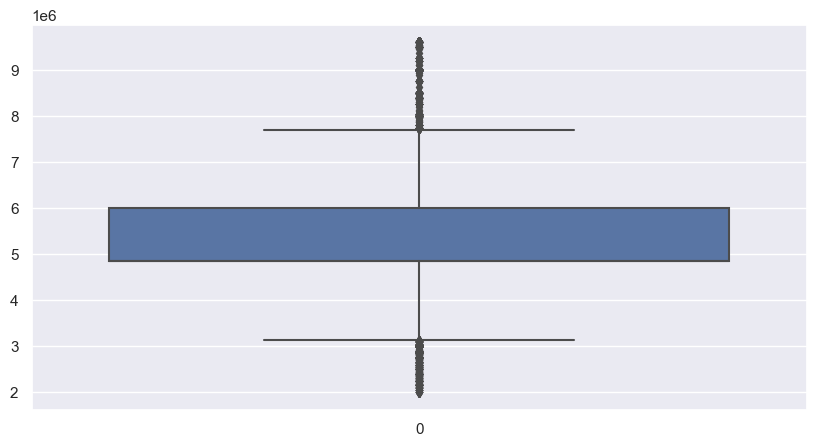

In [125]:
# Salary
per25Salary = dataset['salary'].quantile(0.25)
per75Salary = dataset['salary'].quantile(0.75)
iqrSalary = per75Salary - per25Salary

lower_limit = per25Salary - 1.5 * iqrSalary
upper_limit = per75Salary + 1.5 * iqrSalary

dataset = dataset[~((dataset["salary"] < (lower_limit)) | (dataset["salary"] > (upper_limit)))]
dataset.reset_index(drop=True, inplace=True)

sns.set(rc={'figure.figsize':(10, 5)})
sns.boxplot(dataset["salary"])
plt.show()

In [126]:
dataset.dropna(inplace=True)


# 3. Discovering Data

In [127]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20893 entries, 0 to 24723
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   job_title         20893 non-null  object 
 1   location          20893 non-null  object 
 2   career_level      20893 non-null  object 
 3   experience_level  20893 non-null  object 
 4   education_level   20893 non-null  object 
 5   employment_type   20893 non-null  object 
 6   salary            20893 non-null  float64
dtypes: float64(1), object(6)
memory usage: 1.3+ MB


**Grouping Categorical & Numerical**

In [128]:
categorical = list(dataset.select_dtypes(include='object'))
print(categorical)

['job_title', 'location', 'career_level', 'experience_level', 'education_level', 'employment_type']


In [129]:
dataset[categorical].describe() 

,job_title,location,career_level,experience_level,education_level,employment_type
count,20893,20893,20893,20893,20893,20893
unique,14640,192,5,15,10,7
top,Sales Executive,Jakarta Raya,Pegawai (non-manajemen & non-supervisor),1,S1,Penuh Waktu
freq,187,4087,15063,8512,7028,17850


In [130]:
numerical = dataset.columns[dataset.dtypes != 'object'].tolist()
print(numerical)

['salary']


In [131]:
dataset[numerical].describe()

,salary
count,2.089300e+04
mean,5.345770e+06
std,1.181111e+06
min,2.000000e+06
25%,4.850000e+06
50%,4.850000e+06
75%,6.600000e+06
max,9.600000e+06


# 4. Data Preprocessing

In [132]:
X = dataset.drop(["salary", "job_title", "location"], axis=1)
y = dataset['salary']

In [133]:
X_train,X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=0)

print(f'Traning Data: {X_train.shape}')
print(f'Testing Data: {X_test.shape}')

Traning Data: (16714, 4)
Testing Data: (4179, 4)


**Split Career Level**

In [134]:
enc_1 = OneHotEncoder(sparse_output=False)

X_train_career = enc_1.fit_transform(X_train[['career_level']])
X_test_career = enc_1.transform(X_test[['career_level']])
X_train_career

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

In [135]:
career_level = enc_1.get_feature_names_out(input_features=['career_level'])

X_train_career = pd.DataFrame(X_train_career, columns=career_level)
X_test_career = pd.DataFrame(X_test_career, columns=career_level)

X_train_career.head()

,career_level_CEO/GM/Direktur/Manajer Senior,career_level_Lulusan baru/Pengalaman kerja kurang dari 1 tahun,career_level_Manajer/Asisten Manajer,career_level_Pegawai (non-manajemen & non-supervisor),career_level_Supervisor/Koordinator
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0


**Split Experience Level**

In [136]:
enc_2 = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

X_train_experience = enc_2.fit_transform(X_train[['experience_level']])
X_test_experience = enc_2.transform(X_test[['experience_level']])
X_train_experience

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [137]:
experience_level = enc_2.get_feature_names_out(input_features=['experience_level'])

X_train_experience = pd.DataFrame(X_train_experience, columns=experience_level)
X_test_experience = pd.DataFrame(X_test_experience, columns=experience_level)

X_train_experience.head()

,experience_level_1,experience_level_10,experience_level_12,experience_level_15,experience_level_18,experience_level_2,experience_level_20,experience_level_3,experience_level_4,experience_level_5,experience_level_6,experience_level_7,experience_level_8,experience_level_9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


**Split Employment Type**

In [138]:
enc_3 = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

X_train_employment = enc_3.fit_transform(X_train[['employment_type']])
X_test_employment = enc_3.transform(X_test[['employment_type']])
X_train_employment

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [139]:
employment_type = enc_3.get_feature_names_out(input_features=['employment_type'])

X_train_employment = pd.DataFrame(X_train_employment, columns=employment_type)
X_test_employment = pd.DataFrame(X_test_employment, columns=employment_type)

X_train_employment.head()

,employment_type_Kontrak,"employment_type_Kontrak, Temporer",employment_type_Paruh Waktu,employment_type_Penuh Waktu,"employment_type_Penuh Waktu, Kontrak","employment_type_Penuh Waktu, Paruh Waktu",employment_type_Temporer
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0


**Split Education Level**

In [140]:
enc_4 = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

X_train_education = enc_4.fit_transform(X_train[['education_level']])
X_test_education = enc_4.transform(X_test[['education_level']])
X_train_education

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [141]:
education_level = enc_4.get_feature_names_out(input_features=['education_level'])

X_train_education = pd.DataFrame(X_train_education, columns=education_level)
X_test_education = pd.DataFrame(X_test_education, columns=education_level)

X_train_education.head()

,education_level_D3 - S1,education_level_D3 - S2,education_level_S1,education_level_S1 - S2,education_level_S1 - S3,education_level_S3,education_level_SMA/SMU,education_level_SMA/SMU - S1,education_level_SMA/SMU - S2,education_level_Tidak terspesifikasi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Reset Index**

In [142]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [143]:
X_train_new = pd.concat([X_train, X_train_career, X_train_experience, X_train_employment, X_train_education], axis=1)
X_train_new.drop(columns=['career_level', 'experience_level', 'employment_type', 'education_level'],inplace=True)

X_test_new = pd.concat([X_test, X_test_career, X_test_experience, X_test_employment, X_test_education], axis=1)
X_test_new.drop(columns=['career_level', 'experience_level', 'employment_type', 'education_level'],inplace=True)

X_train_new.head()

,career_level_CEO/GM/Direktur/Manajer Senior,career_level_Lulusan baru/Pengalaman kerja kurang dari 1 tahun,career_level_Manajer/Asisten Manajer,career_level_Pegawai (non-manajemen & non-supervisor),career_level_Supervisor/Koordinator,experience_level_1,experience_level_10,experience_level_12,experience_level_15,experience_level_18,...,education_level_D3 - S1,education_level_D3 - S2,education_level_S1,education_level_S1 - S2,education_level_S1 - S3,education_level_S3,education_level_SMA/SMU,education_level_SMA/SMU - S1,education_level_SMA/SMU - S2,education_level_Tidak terspesifikasi
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 5. Predict Data OLS

In [144]:
X_train_ols = sm.add_constant(X_train_new)
ModelOLS = sm.OLS(y_train, X_train_ols).fit()

In [145]:
print(ModelOLS.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     477.7
Date:                Mon, 19 Jun 2023   Prob (F-statistic):               0.00
Time:                        20:57:24   Log-Likelihood:            -2.5202e+05
No. Observations:               16714   AIC:                         5.041e+05
Df Residuals:                   16681   BIC:                         5.044e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

**Visualisasi Data Koefisien**

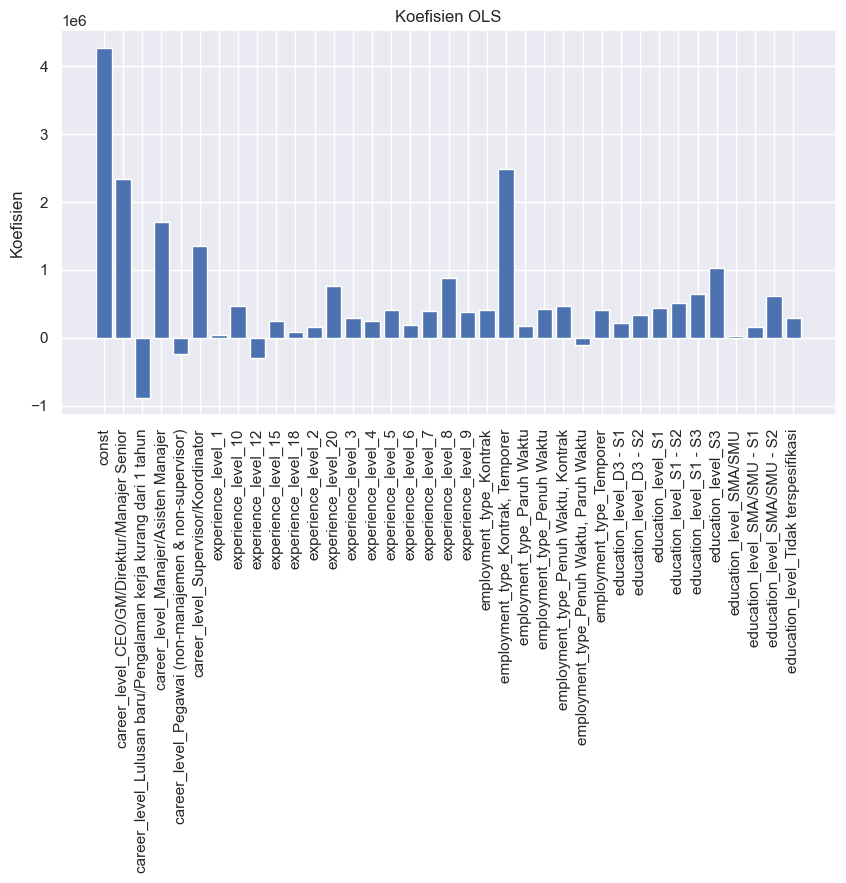

In [146]:
plt.bar(range(len(ModelOLS.params)), ModelOLS.params)
plt.xlabel('')
plt.ylabel('Koefisien')
plt.title('Koefisien OLS')
plt.xticks(range(len(ModelOLS.params)), X_train_ols.columns, rotation=90)
plt.show()

In [147]:
# Rumus MAPE Training Data
absolute_error_OLS_train = np.abs(y_train - ModelOLS.predict(X_train_ols))
percentage_error_OLS_train = absolute_error_OLS_train / y_train * 100

In [148]:
print('-------- Training Data OLS ---------')
y_train_OLS = ModelOLS.predict(sm.add_constant(X_train_new))
print("MSE  :", "{:.4f}".format(mean_squared_error(y_train, y_train_OLS)))
print("MAE  :", "{:.4f}".format(mean_absolute_error(y_train, y_train_OLS)))
print("RMSE :", "{:.4f}".format(math.sqrt(mean_squared_error(y_train, y_train_OLS))))
print("MAD  :", "{:.4f}".format(np.mean(np.abs(y_train - y_train_OLS))))
print("MAPE  :", "{:.4f}".format(np.mean(percentage_error_OLS_train)))

-------- Training Data OLS ---------
MSE  : 731600107518.8496
MAE  : 463795.0614
RMSE : 855336.2541
MAD  : 463795.0614
MAPE  : 9.5344


In [149]:
# Rumus MAPE Testing Data
absolute_error_OLS_test = np.abs(y_test - ModelOLS.predict(sm.add_constant(X_test_new)))
percentage_error_OLS_test = absolute_error_OLS_test / y_test * 100

In [150]:
print('-------- Testing Data OLS ---------')
y_test_OLS = ModelOLS.predict(sm.add_constant(X_test_new))
print("MSE  :", mean_squared_error(y_test, y_test_OLS))
print("MAE  :", mean_absolute_error(y_test, y_test_OLS))
print("RMSE :", math.sqrt(mean_squared_error(y_test, y_test_OLS)))
print("MAD  :", np.mean(np.abs(y_test - y_test_OLS)))
print("MAPE  :", "{:.4f}".format(np.mean(percentage_error_OLS_test)))

-------- Testing Data OLS ---------
MSE  : 697702524656.2706
MAE  : 455623.76328338566
RMSE : 835285.8939646177
MAD  : 455623.76328338566
MAPE  : 9.2368


# 6. Predict Data Random Forest

In [151]:
modelRF = RandomForestRegressor(n_estimators=100, random_state=0)
modelRF.fit(X_train_new, y_train)

RandomForestRegressor(random_state=0)

In [152]:
parameter_estimate  = modelRF.feature_importances_
for variable, parameter_estimate  in zip(X_train_new.columns, parameter_estimate):
    print(f'{variable}: {parameter_estimate :.4e}')

career_level_CEO/GM/Direktur/Manajer Senior: 3.3386e-03
career_level_Lulusan baru/Pengalaman kerja kurang dari 1 tahun: 1.9869e-02
career_level_Manajer/Asisten Manajer: 1.1520e-01
career_level_Pegawai (non-manajemen & non-supervisor): 3.1827e-03
career_level_Supervisor/Koordinator: 7.5150e-01
experience_level_1: 2.0217e-02
experience_level_10: 1.1559e-03
experience_level_12: 1.8100e-04
experience_level_15: 5.3287e-08
experience_level_18: 1.0038e-06
experience_level_2: 7.3813e-03
experience_level_20: 2.3579e-04
experience_level_3: 4.8888e-03
experience_level_4: 2.5147e-03
experience_level_5: 5.6192e-03
experience_level_6: 3.5133e-04
experience_level_7: 1.4371e-03
experience_level_8: 2.2788e-03
experience_level_9: 3.8479e-08
employment_type_Kontrak: 4.3404e-03
employment_type_Kontrak, Temporer: 3.2836e-04
employment_type_Paruh Waktu: 1.3239e-03
employment_type_Penuh Waktu: 5.8172e-03
employment_type_Penuh Waktu, Kontrak: 1.3831e-04
employment_type_Penuh Waktu, Paruh Waktu: 4.9595e-05
emp

**Visualisasi Data Koefisien**

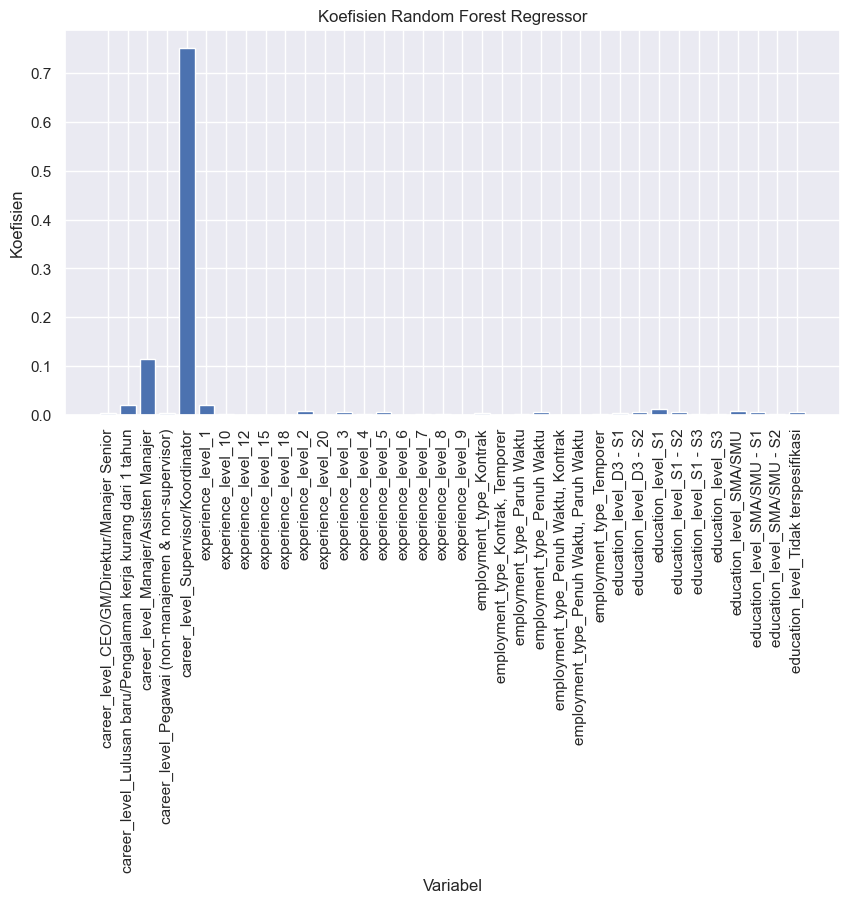

In [153]:
plt.bar(range(len(modelRF.feature_importances_)), modelRF.feature_importances_)
plt.xlabel('Variabel')
plt.ylabel('Koefisien')
plt.title('Koefisien Random Forest Regressor')
plt.xticks(range(len(modelRF.feature_importances_)), X_train_new.columns, rotation=90)
plt.show()

In [154]:
absolute_error_rf_train = np.abs(y_train - modelRF.predict(X_train_new))
percentage_error_rf_train = absolute_error_rf_train / y_train * 100

In [155]:
print('-------- Training Data Random Forest ---------')
y_train_pred_rf = modelRF.predict(X_train_new)
print("MSE  :", "{:.4f}".format(mean_squared_error(y_train, y_train_pred_rf)))
print("MAE  :", "{:.4f}".format(mean_absolute_error(y_train, y_train_pred_rf)))
print("RMSE :", "{:.4f}".format(math.sqrt(mean_squared_error(y_train, y_train_pred_rf))))
print("MAD  :", "{:.4f}".format(np.mean(np.abs(y_train - y_train_pred_rf))))
print("MAPE  :", "{:.4f}".format(np.mean(percentage_error_rf_train)))


-------- Training Data Random Forest ---------
MSE  : 702859917311.4092
MAE  : 451151.7764
RMSE : 838367.4119
MAD  : 451151.7764
MAPE  : 9.3056


In [156]:
absolute_error_rf_test = np.abs(y_test - modelRF.predict(X_test_new))
percentage_error_rf_test = absolute_error_rf_test / y_test * 100

In [157]:
print('\n-------- Testing Data Random Forest ---------')
y_test_pred_rf = modelRF.predict(X_test_new)
print("MSE  :", mean_squared_error(y_test, y_test_pred_rf))
print("MAE  :", mean_absolute_error(y_test, y_test_pred_rf))
print("RMSE :", math.sqrt(mean_squared_error(y_test, y_test_pred_rf)))
print("MAD  :", np.mean(np.abs(y_test - y_test_pred_rf)))
print("MAPE  :", "{:.4f}".format(np.mean(percentage_error_rf_test)))


-------- Testing Data Random Forest ---------
MSE  : 693059868953.133
MAE  : 451275.79020988225
RMSE : 832502.1735425879
MAD  : 451275.79020988225
MAPE  : 9.1638


# Tes Ulang 

In [158]:
X_train_ulang = pd.concat([X_train, X_train_career], axis=1)
X_train_ulang.drop(columns=['career_level', 'experience_level', 'employment_type', 'education_level'],inplace=True)

X_test_ulang = pd.concat([X_test, X_test_career], axis=1)
X_test_ulang.drop(columns=['career_level', 'experience_level', 'employment_type', 'education_level'],inplace=True)

**Metode OLS**

In [159]:
X_train_ulang_ols = sm.add_constant(X_train_ulang)
ModelOLS_ulang = sm.OLS(y_train, X_train_ulang_ols).fit()
print(ModelOLS_ulang.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     3474.
Date:                Mon, 19 Jun 2023   Prob (F-statistic):               0.00
Time:                        20:57:29   Log-Likelihood:            -2.5239e+05
No. Observations:               16714   AIC:                         5.048e+05
Df Residuals:                   16709   BIC:                         5.048e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [160]:
# Rumus MAPE Training Data
absolute_error_OLS_train = np.abs(y_train - ModelOLS_ulang.predict(X_train_ulang_ols))
percentage_error_OLS_train = absolute_error_OLS_train / y_train * 100

In [161]:
print('-------- Training Data OLS ---------')
y_train_OLS = ModelOLS_ulang.predict(sm.add_constant(X_train_ulang))
print("MSE  :", "{:.4f}".format(mean_squared_error(y_train, y_train_OLS)))
print("MAE  :", "{:.4f}".format(mean_absolute_error(y_train, y_train_OLS)))
print("RMSE :", "{:.4f}".format(math.sqrt(mean_squared_error(y_train, y_train_OLS))))
print("MAD  :", "{:.4f}".format(np.mean(np.abs(y_train - y_train_OLS))))
print("MAPE  :", "{:.4f}".format(np.mean(percentage_error_OLS_train)))

-------- Training Data OLS ---------
MSE  : 765425263163.9698
MAE  : 413468.4791
RMSE : 874885.8572
MAD  : 413468.4791
MAPE  : 8.6083


In [162]:
# Rumus MAPE Testing Data
absolute_error_OLS_test = np.abs(y_test - ModelOLS_ulang.predict(sm.add_constant(X_test_ulang)))
percentage_error_OLS_test = absolute_error_OLS_test / y_test * 100

In [163]:
print('-------- Testing Data OLS ---------')
y_test_OLS = ModelOLS_ulang.predict(sm.add_constant(X_test_ulang))
print("MSE  :", mean_squared_error(y_test, y_test_OLS))
print("MAE  :", mean_absolute_error(y_test, y_test_OLS))
print("RMSE :", math.sqrt(mean_squared_error(y_test, y_test_OLS)))
print("MAD  :", np.mean(np.abs(y_test - y_test_OLS)))
print("MAPE  :", "{:.4f}".format(np.mean(percentage_error_OLS_test)))

-------- Testing Data OLS ---------
MSE  : 719154676416.8306
MAE  : 402351.65971485554
RMSE : 848029.8794363502
MAD  : 402351.65971485554
MAPE  : 8.2364


**Metode Random Forest**

In [164]:
modelRF_ulang = RandomForestRegressor(n_estimators=100, random_state=0)
modelRF_ulang.fit(X_train_ulang, y_train)

RandomForestRegressor(random_state=0)

In [165]:
parameter_estimate  = modelRF_ulang.feature_importances_
for variable, parameter_estimate  in zip(X_train_new.columns, parameter_estimate):
    print(f'{variable}: {parameter_estimate :.4e}')

career_level_CEO/GM/Direktur/Manajer Senior: 3.3397e-03
career_level_Lulusan baru/Pengalaman kerja kurang dari 1 tahun: 2.2379e-02
career_level_Manajer/Asisten Manajer: 1.2890e-01
career_level_Pegawai (non-manajemen & non-supervisor): 4.3465e-03
career_level_Supervisor/Koordinator: 8.4103e-01


In [166]:
absolute_error_rf_train = np.abs(y_train - modelRF_ulang.predict(X_train_ulang))
percentage_error_rf_train = absolute_error_rf_train / y_train * 100

In [167]:
print('-------- Training Data Random Forest ---------')
y_train_pred_rf = modelRF_ulang.predict(X_train_ulang)
print("MSE  :", "{:.4f}".format(mean_squared_error(y_train, y_train_pred_rf)))
print("MAE  :", "{:.4f}".format(mean_absolute_error(y_train, y_train_pred_rf)))
print("RMSE :", "{:.4f}".format(math.sqrt(mean_squared_error(y_train, y_train_pred_rf))))
print("MAD  :", "{:.4f}".format(np.mean(np.abs(y_train - y_train_pred_rf))))
print("MAPE  :", "{:.4f}".format(np.mean(percentage_error_rf_train)))

-------- Training Data Random Forest ---------
MSE  : 765430041659.3984
MAE  : 414495.8374
RMSE : 874888.5881
MAD  : 414495.8374
MAPE  : 8.6304


In [168]:
absolute_error_rf_test = np.abs(y_test - modelRF_ulang.predict(X_test_ulang))
percentage_error_rf_test = absolute_error_rf_test / y_test * 100

In [169]:
print('\n-------- Testing Data Random Forest ---------')
y_test_pred_rf = modelRF_ulang.predict(X_test_ulang)
print("MSE  :", mean_squared_error(y_test, y_test_pred_rf))
print("MAE  :", mean_absolute_error(y_test, y_test_pred_rf))
print("RMSE :", math.sqrt(mean_squared_error(y_test, y_test_pred_rf)))
print("MAD  :", np.mean(np.abs(y_test - y_test_pred_rf)))
print("MAPE  :", "{:.4f}".format(np.mean(percentage_error_rf_test)))


-------- Testing Data Random Forest ---------
MSE  : 719029929417.2008
MAE  : 403330.7653525878
RMSE : 847956.3251826128
MAD  : 403330.7653525878
MAPE  : 8.2573
